In [1]:
%pylab inline
import sys
from scipy.interpolate import interp1d
sys.path.append('../../MW-LMC-SCF/code/')
from coefficients_smoothing import get_coefficients

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gala.potential.scf as bfet
import gala.potential 

In [4]:
# 
coeff_path = '/home/xzk/work/github/time-dependent-BFE/data/MWLMC5_MW/BFE_MWLMC5_b1snap_'
snap1 = 0
snap2 = 110
init_time= snap1*0.02
max_time = snap2*0.02
dt = 0.005

In [5]:
S_all = np.zeros((snap2, 21, 21, 21))
T_all = np.zeros((snap2, 21, 21, 21))

for i in range(snap2):
    S_all[i], T_all[i], N = get_coefficients('LMC5', 'radial', 'MW', i, 3, 1.8E-6)

../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [54]:
S_all2 = np.zeros((int(snap2/2.), 21, 21, 21))
T_all2 = np.zeros((int(snap2/2.), 21, 21, 21))
j=0
for i in range(0, snap2, 2):
    S_all2[j], T_all2[j], N = get_coefficients('LMC5', 'radial', 'MW', i, 3, 1.8E-6)
    j+=1

In [32]:
0.02*4

0.08

In [62]:
S_all3 = np.zeros((int(snap2/4.)+1, 21, 21, 21))
T_all3 = np.zeros((int(snap2/4.)+1, 21, 21, 21))
j=0
for i in range(0, snap2, 4):
    S_all3[j], T_all3[j], N = get_coefficients('LMC5', 'radial', 'MW', i, 3, 1.8E-6)
    j+=1

In [77]:
S_all4 = np.zeros((int(snap2/6.)+1, 21, 21, 21))
T_all4 = np.zeros((int(snap2/6.)+1, 21, 21, 21))
j=0
for i in range(0, snap2, 6):
    S_all4[j], T_all4[j], N = get_coefficients('LMC5', 'radial', 'MW', i, 3, 1.8E-6)
    j+=1

../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [78]:
time_array = np.arange(init_time, max_time, 0.02)
time_array_2 = np.arange(init_time, np.max(time_array), 0.04)
time_array_3 = np.arange(init_time, np.max(time_array), 0.08)
time_array_4 = np.arange(init_time, np.max(time_array), 0.12)

#time_array_new = np.arange(init_time, np.max(time_array), )

In [10]:
def coefficients_interpolation(S, T, time_sim, time_interp, nmax, lmax, kind):
    # time arrays
    #print(time, dt_nbody)
    #time_array = np.linspace(0, time, time/dt_nbody+1)
    #time_array_new = np.linspace(0, time, time/dt_int+2)

    ## Coefficient Matrices size: [time, nmax+1, lmax+1, lmax+1]
    S_new = np.zeros((len(time_interp), nmax+1, lmax+1, lmax+1))
    T_new = np.zeros((len(time_interp), nmax+1, lmax+1, lmax+1))
    # Interpolating the coefficients.
    for i in range(nmax+1):
        for j in range(lmax+1):
            for k in range(lmax+1):
                if k<=j:
                    # put the constrain k<j ?·
                    #print(len(S[:,i,j,k]))
                    f = interp1d(time_sim, S[:,i,j,k], kind=kind)
                    #rint(S[:,i,j,k])
                    S_new[:,i,j,k] = f(time_interp)
                    f2 = interp1d(time_sim, T[:,i,j,k], kind=kind)
                    T_new[:,i,j,k] = f2(time_interp)

    return S_new, T_new

In [11]:
def interp_test(S_all, T_all , time_array, dt_interp):
    time_array_new = np.arange(init_time, np.max(time_array), dt_interp)
    S_interp, T_interp = coefficients_interpolation(S_all, T_all, time_array, time_array_new, 20, 20, kind='linear')
    S_interp_c, T_interp_c = coefficients_interpolation(S_all, T_all, time_array, time_array_new, 20, 20, kind='cubic')
    return S_interp, T_interp, S_interp_c, T_interp_c

In [12]:
S_dt1_l, T_dt1_l, S_dt1_c, T_dt1_c = interp_test(S_all, T_all, time_array, 0.01)
S_dt2_l, T_dt2_l, S_dt2_c, T_dt2_c = interp_test(S_all, T_all, time_array, 0.005)
S_dt3_l, T_dt3_l, S_dt3_c, T_dt3_c = interp_test(S_all, T_all, time_array, 0.05)
S_dt4_l, T_dt4_l, S_dt4_c, T_dt4_c = interp_test(S_all, T_all, time_array, 0.1)

In [79]:
S2_dt2_l, T3_dt2_l, S2_dt2_c, T2_dt2_c = interp_test(S_all2, T_all2, time_array_2, 0.02)
S3_dt2_l, T3_dt2_l, S3_dt2_c, T3_dt2_c = interp_test(S_all3, T_all3, time_array_3, 0.02)
S4_dt2_l, T4_dt2_l, S4_dt2_c, T4_dt2_c = interp_test(S_all4, T_all4, time_array_4, 0.02)

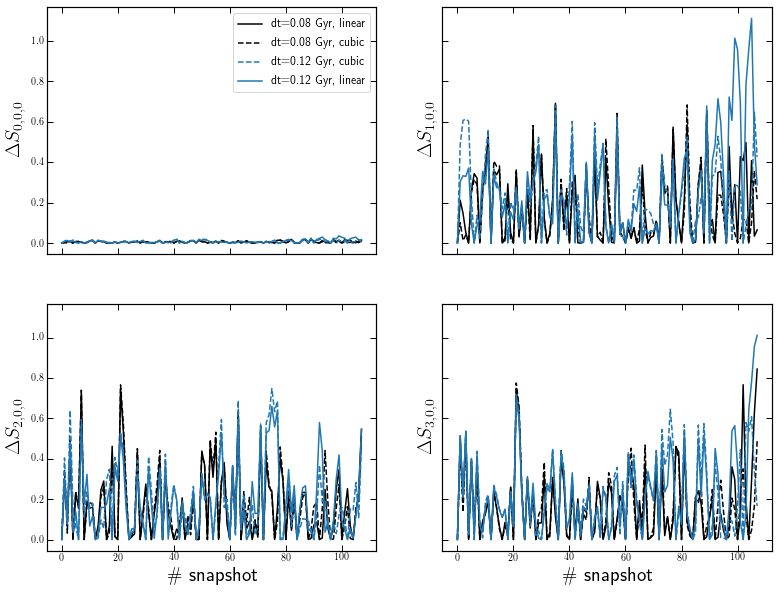

In [124]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10), sharex=True, sharey=True)

axs = ax.flatten()
n=0
for n in range(4):
    

    #axs[0].plot(100*np.abs(S2_dt2_l[:,n,0,0]-S_all[:108,n,0,0]) / S_all[:108,n,0,0], label='dt = ')
    axs[n].plot(100*np.abs(S3_dt2_l[:,n,0,0]-S_all[:108,n,0,0]) / np.abs(S_all[:108,n,0,0]), c='k', label='dt=0.08 Gyr, linear')
    axs[n].plot(100*np.abs(S3_dt2_c[:,n,0,0]-S_all[:108,n,0,0]) / np.abs(S_all[:108,n,0,0]), c='k', ls='--', label='dt=0.08 Gyr, cubic')
    axs[n].plot(100*np.abs(S4_dt2_c[:,n,0,0]-S_all[:108,n,0,0]) / np.abs(S_all[:108,n,0,0]), c='C0', ls='--', label='dt=0.12 Gyr, cubic')
    axs[n].plot(100*np.abs(S4_dt2_l[:,n,0,0]-S_all[:108,n,0,0]) / np.abs(S_all[:108,n,0,0]), c='C0', label='dt=0.12 Gyr, linear')
   
    if n==0:
        axs[n].legend(fontsize=12)
    #axs[0].plot(100*np.abs(S2_dt2_c[:,n,0,0]-S_all[:108,n,0,0]) / S_all[:108,n,0,0], c='C0', ls='--')


axs[0].set_ylabel(r'$\Delta S_{0,0,0}$')
axs[1].set_ylabel(r'$\Delta S_{1,0,0}$')
axs[2].set_ylabel(r'$\Delta S_{2,0,0}$')
axs[3].set_ylabel(r'$\Delta S_{3,0,0}$')

axs[2].set_xlabel('$\#$ snapshot')
axs[3].set_xlabel('$\#$ snapshot')

#axs[0].set_xlabel('$\#$ snapshot')
#axs[0].set_ylabel(r'$\Delta S_{nlm}$')
savefig('coeff_interpolation_dt.pdf', bbox_inches='tight')

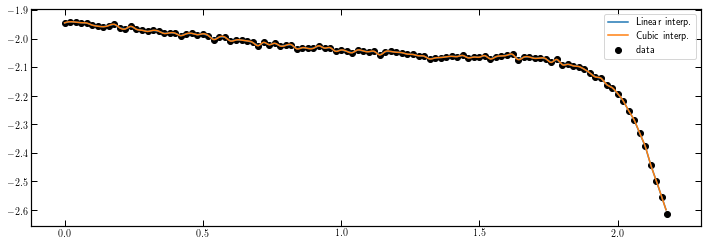

In [170]:
plt.figure(figsize=(12, 4))
plot(time_array_new, S_interp[:,1,0,0], c='C0', label='Linear interp.')
plot(time_array_new, S_interp_c[:,1,0,0], c='C1', label='Cubic interp.')
scatter(time_array, S_all[:,1,0,0], label='data', c='k')
legend()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0,0.5,'$\\Delta \\rm{A}_{nlm}(\\%)$')

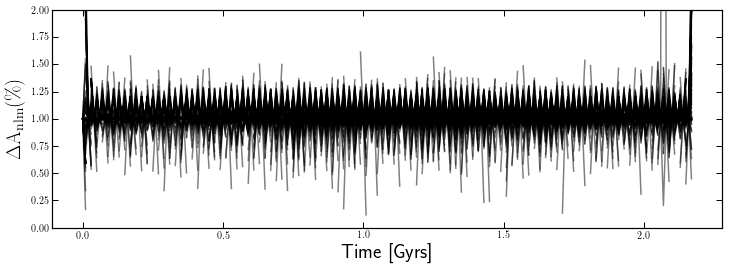

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
for n in range(20):
    for l in range(20):
        ax.plot(time_array_new, np.abs((S_interp_c[:,n,l,0]/S_interp[:,n,l,0])), c='k', alpha=0.5)
ylim(0, 2)
xlabel('Time [Gyrs]')
ylabel(r'$\Delta \rm{A}_{nlm}(\%)$')
#@fig.legend()

In [157]:
# Todo : test more spaced interpolation 
# Interpolate COM
# Smoothening coefficients inerpolation

In [18]:
def coeff_oned(S_l, T_l, S_c, T_c, len_t):
    
    S_all_l_2 = np.zeros((len_t, 9261))
    S_all_c_2 = np.zeros((len_t, 9261))
    T_all_l_2 = np.zeros((len_t, 9261))
    T_all_c_2 = np.zeros((len_t, 9261))

    for i in range(len_t):
        S_all_l_2[i] = S_l[i].flatten()
        S_all_c_2[i] = S_c[i].flatten()
        T_all_l_2[i] = T_l[i].flatten()
        T_all_c_2[i] = T_c[i].flatten()
    return S_all_l_2, T_all_l_2, S_all_c_2, T_all_c_2

In [16]:
t1 = shape(S_dt1_c)[0]
t2 = shape(S_dt2_c)[0]
t3 = shape(S_dt3_c)[0]
t4 = shape(S_dt4_c)[0]

In [19]:
S1d_dt1_l, T1d_dt1_l, S1d_dt1_c, T1d_dt1_c = coeff_oned(S_dt1_l, T_dt1_l, S_dt1_c, T_dt1_c, t1)
S2d_dt2_l, T2d_dt2_l, S2d_dt2_c, T2d_dt2_c = coeff_oned(S_dt2_l, T_dt2_l, S_dt2_c, T_dt2_c, t2)
S3d_dt3_l, T3d_dt3_l, S3d_dt3_c, T3d_dt3_c = coeff_oned(S_dt3_l, T_dt3_l, S_dt3_c, T_dt3_c, t3)
S4d_dt4_l, T4d_dt4_l, S4d_dt4_c, T4d_dt4_c = coeff_oned(S_dt4_l, T_dt4_l, S_dt4_c, T_dt4_c, t4)

In [20]:
h_s1 = np.zeros(30)
h_t1 = np.zeros(30)
h_s2 = np.zeros(30)
h_t2 = np.zeros(30)
h_s3 = np.zeros(30)
h_t3 = np.zeros(30)
h_s4 = np.zeros(30)
h_t4 = np.zeros(30)

h_s1_2 = np.zeros(30)
h_t1_2 = np.zeros(30)
h_s2_2 = np.zeros(30)
h_t2_2 = np.zeros(30)
h_s3_2 = np.zeros(30)
h_t3_2 = np.zeros(30)
h_s4_2 = np.zeros(30)
h_t4_2 = np.zeros(30)

for i in range(9261):
    h1, bins = histogram(S1d_dt1_c[:,i]/S1d_dt1_l[:,i], bins=30, range=(0, 2))
    h2, bins = histogram(T1d_dt1_c[:,i]/T1d_dt1_l[:,i], bins=30, range=(0, 2))
    h3, bins = histogram(S2d_dt2_c[:,i]/S2d_dt2_l[:,i], bins=30, range=(0, 2))
    h4, bins = histogram(T2d_dt2_c[:,i]/T2d_dt2_l[:,i], bins=30, range=(0, 2))
    
    h5, bins = histogram(S1d_dt1_l[:,i]/S1d_dt1_c[:,i], bins=30, range=(0, 2))
    h6, bins = histogram(T1d_dt1_l[:,i]/T1d_dt1_c[:,i], bins=30, range=(0, 2))
    h7, bins = histogram(S2d_dt2_l[:,i]/S2d_dt2_c[:,i], bins=30, range=(0, 2))
    h8, bins = histogram(T2d_dt2_l[:,i]/T2d_dt2_c[:,i], bins=30, range=(0, 2))
    
    h9, bins = histogram(S3d_dt3_c[:,i]/S3d_dt3_l[:,i], bins=30, range=(0, 2))
    h10, bins = histogram(T3d_dt3_c[:,i]/T3d_dt3_l[:,i], bins=30, range=(0, 2))
    h11, bins = histogram(S4d_dt4_c[:,i]/S4d_dt4_l[:,i], bins=30, range=(0, 2))
    h12, bins = histogram(T4d_dt4_c[:,i]/T4d_dt4_l[:,i], bins=30, range=(0, 2))
    
    h13, bins = histogram(S3d_dt3_l[:,i]/S3d_dt3_c[:,i], bins=30, range=(0, 2))
    h14, bins = histogram(T3d_dt3_l[:,i]/T3d_dt3_c[:,i], bins=30, range=(0, 2))
    h15, bins = histogram(S4d_dt4_l[:,i]/S4d_dt4_c[:,i], bins=30, range=(0, 2))
    h16, bins = histogram(T4d_dt4_l[:,i]/T4d_dt4_c[:,i], bins=30, range=(0, 2))
    
    h_s1 += h1
    h_t1 += h2
    h_s2 += h3
    h_t2 += h4
    h_s1_2 += h5
    h_t1_2 += h6
    h_s2_2 += h7
    h_t2_2 += h8
    
    
    h_s3 += h9
    h_t3 += h10
    h_s4 += h11
    h_t4 += h12
    h_t3_2 += h13
    h_t3_2 += h14
    h_t4_2 += h15
    h_t4_2 += h16

<ipython-input-20-35cc5845096e>:21: RuntimeWarning: invalid value encountered in true_divide
  h2, bins = histogram(T1d_dt1_c[:,i]/T1d_dt1_l[:,i], bins=30, range=(0, 2))
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-20-35cc5845096e>:23: RuntimeWarning: invalid value encountered in true_divide
  h4, bins = histogram(T2d_dt2_c[:,i]/T2d_dt2_l[:,i], bins=30, range=(0, 2))
<ipython-input-20-35cc5845096e>:26: RuntimeWarning: invalid value encountered in true_divide
  h6, bins = histogram(T1d_dt1_l[:,i]/T1d_dt1_c[:,i], bins=30, range=(0, 2))
<ipython-input-20-35cc5845096e>:28: RuntimeWarning: invalid value encountered in true_divide
  h8, bins = histogram(T2d_dt2_l[:,i]/T2d_dt2_c[:,i], bins=30, range=(0, 2))
<ipytho

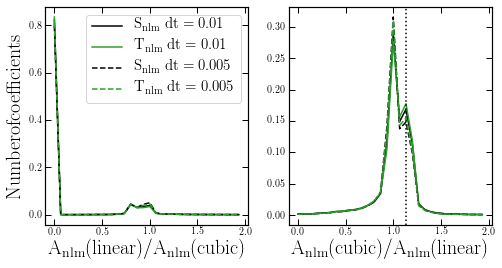

In [229]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[1].plot(bins[:-1], h_s1[:]/np.sum(h_s1), c='k')
ax[1].plot(bins[:-1], h_t1[:]/np.sum(h_t1),  c='C2')
ax[1].plot(bins[:-1], h_s2[:]/np.sum(h_s2),  c='k', ls='--')
ax[1].plot(bins[:-1], h_t2[:]/np.sum(h_t2),  c='C2', ls='--')

ax[0].plot(bins[:-1], h_s1_2[:]/np.sum(h_s1_2), label=r'$\rm{S_{nlm}\ dt=0.01}$', c='k')
ax[0].plot(bins[:-1], h_t1_2[:]/np.sum(h_t1_2), label=r'$\rm{T_{nlm}\ dt=0.01}$', c='C2')
ax[0].plot(bins[:-1], h_s2_2[:]/np.sum(h_s2_2), label=r'$\rm{S_{nlm}\ dt=0.005}$', c='k', ls='--')
ax[0].plot(bins[:-1], h_t2_2[:]/np.sum(h_t2_2), label=r'$\rm{T_{nlm}\ dt=0.005}$', c='C2', ls='--')

ax[0].legend(fontsize=15)
ax[1].set_xlabel(r'$\rm{A_{nlm}(cubic)/A_{nlm}(linear)}$')
ax[0].set_ylabel(r'$\rm{Number of coefficients}$')

ax[0].set_xlabel(r'$\rm{A_{nlm}(linear)/A_{nlm}(cubic)}$')
ax[1].axvline(1.13, c='k', ls=':')

savefig('coeff_interpolation.png', bbox_inches='tight')

No handles with labels found to put in legend.


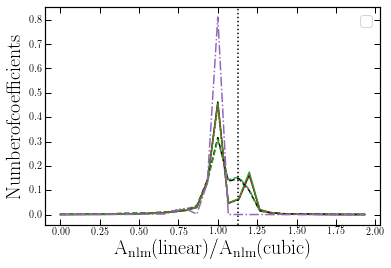

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(bins[:-1], h_s1[:]/np.sum(h_s1), c='k')
ax.plot(bins[:-1], h_t1[:]/np.sum(h_t1),  c='C2')
ax.plot(bins[:-1], h_s2[:]/np.sum(h_s2),  c='k', ls='--')
ax.plot(bins[:-1], h_t2[:]/np.sum(h_t2),  c='C2', ls='--')

ax.plot(bins[:-1], h_s3[:]/np.sum(h_s3),  c='C3', ls=':')
#ax[0].plot(bins[:-1], h_t3[:]/np.sum(h_t4),  c='C3', ls='--')

ax.plot(bins[:-1], h_s4[:]/np.sum(h_s4),  c='C4', ls='-.')
#ax[0].plot(bins[:-1], h_t4[:]/np.sum(h_t4),  c='C4', ls='--')


ax.legend(fontsize=15)
ax.set_xlabel(r'$\rm{A_{nlm}(cubic)/A_{nlm}(linear)}$')
ax.set_ylabel(r'$\rm{Number of coefficients}$')

ax.set_xlabel(r'$\rm{A_{nlm}(linear)/A_{nlm}(cubic)}$')
ax.axvline(1.13, c='k', ls=':')

#savefig('coeff_interpolation.png', bbox_inches='tight')

In [230]:
# COM interpolation:
# reading COM of the expansion

In [231]:
data = np.loadtxt('../../MW_anisotropy/data/orbits/LMC5_100Mb1_orbit.txt')

In [258]:
x_mw = data[:,0]
y_mw = data[:,1]
z_mw = data[:,2]


x_lmc = data[:,6] - data[:,0]
y_lmc = data[:,7] - data[:,1]
z_lmc = data[:,8] - data[:,2]

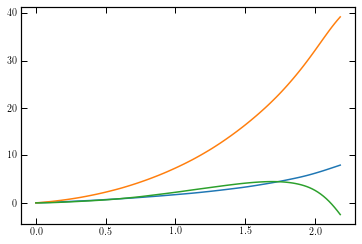

In [259]:
plot(time_array, x_mw[:110]-x_mw[0])
plot(time_array, y_mw[:110]-y_mw[0])
plot(time_array, z_mw[:110]-z_mw[0])

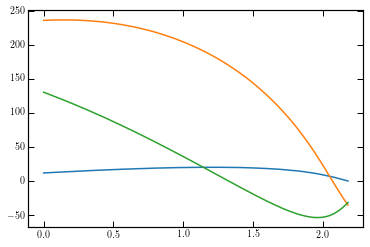

In [260]:
plot(time_array, x_lmc[:110])
plot(time_array, y_lmc[:110])
plot(time_array, z_lmc[:110])

In [261]:
fx_lmc_l = interp1d(time_array, x_lmc[:110], kind='linear')
fy_lmc_l = interp1d(time_array, y_lmc[:110], kind='linear')
fz_lmc_l = interp1d(time_array, z_lmc[:110], kind='linear')

fx_lmc_c = interp1d(time_array, x_lmc[:110], kind='cubic')
fy_lmc_c = interp1d(time_array, y_lmc[:110], kind='cubic')
fz_lmc_c = interp1d(time_array, z_lmc[:110], kind='cubic')



fx_l = interp1d(time_array, x_mw[:110], kind='linear')
fy_l = interp1d(time_array, y_mw[:110], kind='linear')
fz_l = interp1d(time_array, z_mw[:110], kind='linear')

fx_c = interp1d(time_array, x_mw[:110], kind='cubic')
fy_c = interp1d(time_array, y_mw[:110], kind='cubic')
fz_c = interp1d(time_array, z_mw[:110], kind='cubic')



In [265]:
x_interp_l = fx_l(time_array_new)
x_interp_c = fx_c(time_array_new)
y_interp_l = fy_l(time_array_new)
y_interp_c = fy_c(time_array_new)
z_interp_l = fz_l(time_array_new)
z_interp_c = fz_c(time_array_new)

x_lmc_interp_l = fx_lmc_l(time_array_new)
x_lmc_interp_c = fx_lmc_c(time_array_new)
y_lmc_interp_l = fy_lmc_l(time_array_new)
y_lmc_interp_c = fy_lmc_c(time_array_new)
z_lmc_interp_l = fz_lmc_l(time_array_new)
z_lmc_interp_c = fz_lmc_c(time_array_new)

Text(0,0.5,'$(r[kpc])$')

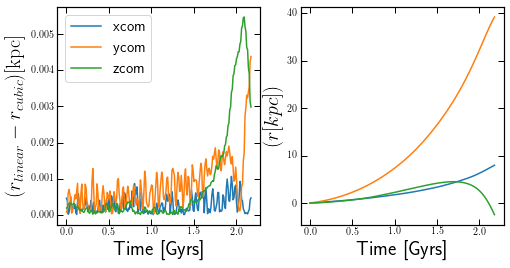

In [267]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(time_array_new[1::2], np.abs(x_interp_l-x_interp_c)[1::2], label='xcom')
ax[0].plot(time_array_new[1::2], np.abs(y_interp_l-y_interp_c)[1::2], label='ycom')
ax[0].plot(time_array_new[1::2], np.abs(z_interp_l-z_interp_c)[1::2], label='zcom')
ax[0].set_xlabel('Time [Gyrs]')
ax[1].set_xlabel('Time [Gyrs]')

ax[1].plot(time_array, x_mw[:110]-x_mw[0])
ax[1].plot(time_array, y_mw[:110]-y_mw[0])
ax[1].plot(time_array, z_mw[:110]-z_mw[0])

ax[0].legend(fontsize=15)
ax[0].set_ylabel(r'$(r_{linear}-r_{cubic})\rm{[kpc]}$')
ax[1].set_ylabel(r'$(r[kpc])$')
#savefig('com_interpolation.png', bbox_inches='tight')

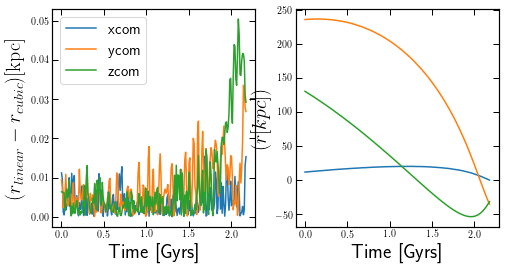

In [268]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(time_array_new[1::2], np.abs(x_lmc_interp_l-x_lmc_interp_c)[1::2], label='xcom')
ax[0].plot(time_array_new[1::2], np.abs(y_lmc_interp_l-y_lmc_interp_c)[1::2], label='ycom')
ax[0].plot(time_array_new[1::2], np.abs(z_lmc_interp_l-z_lmc_interp_c)[1::2], label='zcom')
ax[0].set_xlabel('Time [Gyrs]')
ax[1].set_xlabel('Time [Gyrs]')

ax[1].plot(time_array, x_lmc[:110])
ax[1].plot(time_array, y_lmc[:110])
ax[1].plot(time_array, z_lmc[:110])

ax[0].legend(fontsize=15)
ax[0].set_ylabel(r'$(r_{linear}-r_{cubic})\rm{[kpc]}$')
ax[1].set_ylabel(r'$(r[kpc])$')
savefig('com_interpolation_lmc.png', bbox_inches='tight')